# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Restart the Kernel after you execute this command.

!python -m pip install -r requirements.txt

  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 8.1.8
    Uninstalling ipywidgets-8.1.8:
      Successfully uninstalled ipywidgets-8.1.8


**Important: Restart the Kernel at this moment**

## Imports

In [2]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [3]:
# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Unnormalized transform for visualization (normalized images look distorted)
viz_transform = transforms.Compose([
    transforms.ToTensor()
])

# Create training set and define training dataloader
full_train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Stand-out suggestion 1: Split into training and validation sets (80/20)
train_size = 48000
val_size = 12000
train_set, val_set = torch.utils.data.random_split(
    full_train_set, [train_size, val_size],
    generator=torch.Generator().manual_seed(42)
)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=64, shuffle=False)

# Create test set and define test dataloader
test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

# Visualization loader (unnormalized so show5() displays correctly)
viz_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=viz_transform)
viz_loader = torch.utils.data.DataLoader(viz_set, batch_size=64, shuffle=True)

print(f"Training set size: {len(train_set)}")
print(f"Validation set size: {len(val_set)}")
print(f"Test set size: {len(test_set)}")

  0%|          | 0.00/9.91M [00:00<?, ?B/s]

  0%|          | 32.8k/9.91M [00:00<00:38, 253kB/s]

  1%|          | 98.3k/9.91M [00:00<00:29, 336kB/s]

  2%|▏         | 229k/9.91M [00:00<00:14, 661kB/s] 

  4%|▍         | 426k/9.91M [00:00<00:08, 1.07MB/s]

  8%|▊         | 754k/9.91M [00:00<00:05, 1.75MB/s]

 11%|█         | 1.11M/9.91M [00:00<00:03, 2.25MB/s]

 21%|██        | 2.10M/9.91M [00:00<00:01, 4.50MB/s]

 33%|███▎      | 3.28M/9.91M [00:00<00:01, 6.57MB/s]

 43%|████▎     | 4.29M/9.91M [00:01<00:00, 7.52MB/s]

 63%|██████▎   | 6.23M/9.91M [00:01<00:00, 10.9MB/s]

 76%|███████▌  | 7.54M/9.91M [00:01<00:00, 11.4MB/s]

 93%|█████████▎| 9.21M/9.91M [00:01<00:00, 12.8MB/s]

100%|██████████| 9.91M/9.91M [00:01<00:00, 7.07MB/s]

  0%|          | 0.00/28.9k [00:00<?, ?B/s]

100%|██████████| 28.9k/28.9k [00:00<00:00, 300kB/s]

  0%|          | 0.00/1.65M [00:00<?, ?B/s]

  2%|▏         | 32.8k/1.65M [00:00<00:07, 215kB/s]

  4%|▍         | 65.5k/1.65M [00:00<00:05, 268kB/s]

 14%|█▍        | 229k/1.65M [00:00<00:01, 728kB/s] 

 28%|██▊       | 459k/1.65M [00:00<00:00, 1.24MB/s]

 56%|█████▌    | 918k/1.65M [00:00<00:00, 2.31MB/s]

100%|██████████| 1.65M/1.65M [00:00<00:00, 2.45MB/s]

  0%|          | 0.00/4.54k [00:00<?, ?B/s]

100%|██████████| 4.54k/4.54k [00:00<00:00, 3.85MB/s]

Training set size: 48000
Validation set size: 12000
Test set size: 10000


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

I applied two transforms to the MNIST dataset:

1. **`ToTensor()`** — Converts the PIL images into PyTorch float tensors scaled to [0, 1]. This is required for PyTorch models to process the data.

2. **`Normalize(mean=0.1307, std=0.3081)`** — These are the precomputed mean and standard deviation of the MNIST training set. Normalizing centers the pixel values around zero and scales them to unit variance, which helps gradient-based optimizers converge faster and more reliably.

Additionally, I split the 60,000 training images into a **training set (48,000)** and a **validation set (12,000)** using an 80/20 split with a fixed random seed. This allows monitoring generalization performance during training without touching the held-out test set, helping detect overfitting early.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [4]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

Batch tensor shape: torch.Size([64, 1, 28, 28])
Labels tensor shape: torch.Size([64])
Single image shape: torch.Size([1, 28, 28])
Pixel value range: [-0.4242, 2.8215]

Training samples: 48000
Validation samples: 12000
Test samples: 10000
Number of classes: 10 (digits 0-9)

Class distribution (full training set):
  Digit 0: 5923 samples
  Digit 1: 6742 samples
  Digit 2: 5958 samples
  Digit 3: 6131 samples
  Digit 4: 5842 samples
  Digit 5: 5421 samples
  Digit 6: 5918 samples
  Digit 7: 6265 samples
  Digit 8: 5851 samples
  Digit 9: 5949 samples

Sample images:
8


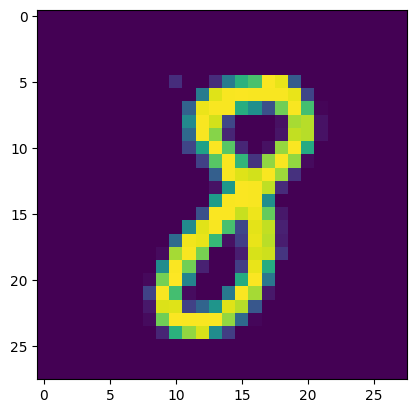

0


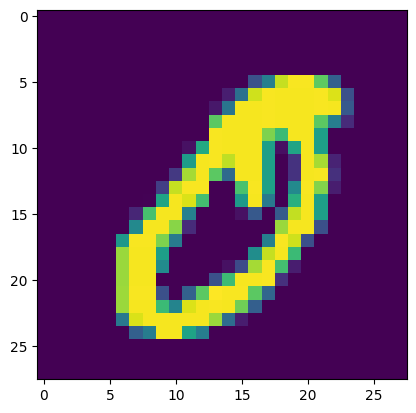

6


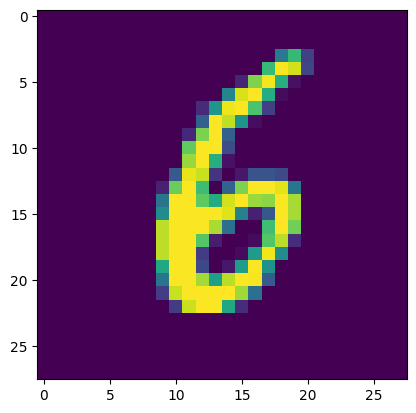

3


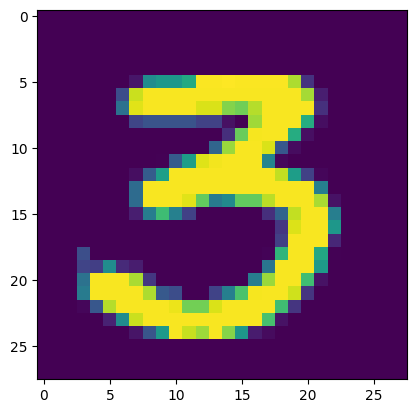

2


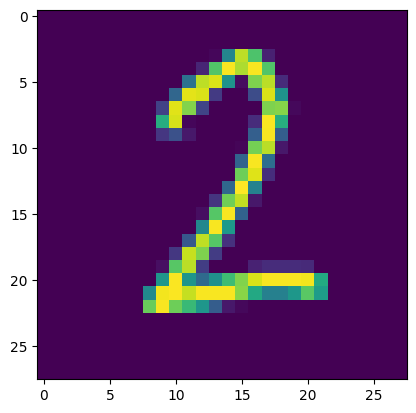

In [5]:
# Explore data dimensions
dataiter = iter(train_loader)
images, labels = next(dataiter)

print(f"Batch tensor shape: {images.shape}")       # [64, 1, 28, 28]
print(f"Labels tensor shape: {labels.shape}")       # [64]
print(f"Single image shape: {images[0].shape}")     # [1, 28, 28]
print(f"Pixel value range: [{images.min():.4f}, {images.max():.4f}]")
print(f"\nTraining samples: {len(train_set)}")
print(f"Validation samples: {len(val_set)}")
print(f"Test samples: {len(test_set)}")
print(f"Number of classes: 10 (digits 0-9)")

# Class distribution in full training set
all_labels = full_train_set.targets
unique, counts = torch.unique(all_labels, return_counts=True)
print(f"\nClass distribution (full training set):")
for digit, count in zip(unique, counts):
    print(f"  Digit {digit.item()}: {count.item()} samples")

# Visualize 5 sample images using unnormalized loader
print("\nSample images:")
show5(viz_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [6]:
class MNISTClassifierMLP(nn.Module):
    def __init__(self):
        super(MNISTClassifierMLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.flatten(x)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = F.log_softmax(self.fc3(x), dim=1)
        return x

model_mlp = MNISTClassifierMLP()
print(model_mlp)
print(f"\nTotal parameters: {sum(p.numel() for p in model_mlp.parameters()):,}")

MNISTClassifierMLP(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

Total parameters: 235,146


Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [7]:
# NLLLoss pairs with LogSoftmax output
criterion = nn.NLLLoss()
optimizer = optim.Adam(model_mlp.parameters(), lr=0.001)

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_mlp.to(device)
print(f"Using device: {device}")

Using device: cpu


## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [8]:
def train_model(model, train_loader, val_loader, criterion, optimizer, device, epochs=15):
    """Train model with validation tracking per epoch."""
    history = {'train_loss': [], 'val_loss': [], 'val_accuracy': []}

    for epoch in range(epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        avg_train_loss = running_loss / len(train_loader)
        history['train_loss'].append(avg_train_loss)

        # Validation phase
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for data, target in val_loader:
                data, target = data.to(device), target.to(device)
                output = model(data)
                val_loss += criterion(output, target).item()
                pred = output.argmax(dim=1)
                correct += pred.eq(target).sum().item()
                total += target.size(0)

        avg_val_loss = val_loss / len(val_loader)
        val_acc = 100.0 * correct / total
        history['val_loss'].append(avg_val_loss)
        history['val_accuracy'].append(val_acc)

        print(f"Epoch {epoch+1:2d}/{epochs} | "
              f"Train Loss: {avg_train_loss:.4f} | "
              f"Val Loss: {avg_val_loss:.4f} | "
              f"Val Accuracy: {val_acc:.2f}%")

    return history

# Train the MLP model
mlp_history = train_model(model_mlp, train_loader, val_loader, criterion, optimizer, device, epochs=15)

Epoch  1/15 | Train Loss: 0.3048 | Val Loss: 0.1693 | Val Accuracy: 94.70%


Epoch  2/15 | Train Loss: 0.1426 | Val Loss: 0.1117 | Val Accuracy: 96.62%


Epoch  3/15 | Train Loss: 0.1073 | Val Loss: 0.0972 | Val Accuracy: 97.03%


Epoch  4/15 | Train Loss: 0.0916 | Val Loss: 0.0973 | Val Accuracy: 97.03%


Epoch  5/15 | Train Loss: 0.0769 | Val Loss: 0.0907 | Val Accuracy: 97.22%


Epoch  6/15 | Train Loss: 0.0680 | Val Loss: 0.0836 | Val Accuracy: 97.48%


Epoch  7/15 | Train Loss: 0.0625 | Val Loss: 0.0901 | Val Accuracy: 97.54%


Epoch  8/15 | Train Loss: 0.0554 | Val Loss: 0.0838 | Val Accuracy: 97.72%


Epoch  9/15 | Train Loss: 0.0542 | Val Loss: 0.0844 | Val Accuracy: 97.70%


Epoch 10/15 | Train Loss: 0.0491 | Val Loss: 0.0889 | Val Accuracy: 97.73%


Epoch 11/15 | Train Loss: 0.0468 | Val Loss: 0.0879 | Val Accuracy: 97.78%


Epoch 12/15 | Train Loss: 0.0452 | Val Loss: 0.0966 | Val Accuracy: 97.50%


Epoch 13/15 | Train Loss: 0.0420 | Val Loss: 0.0823 | Val Accuracy: 97.74%


Epoch 14/15 | Train Loss: 0.0396 | Val Loss: 0.0950 | Val Accuracy: 97.49%


Epoch 15/15 | Train Loss: 0.0382 | Val Loss: 0.0950 | Val Accuracy: 97.67%


Plot the training loss (and validation loss/accuracy, if recorded).

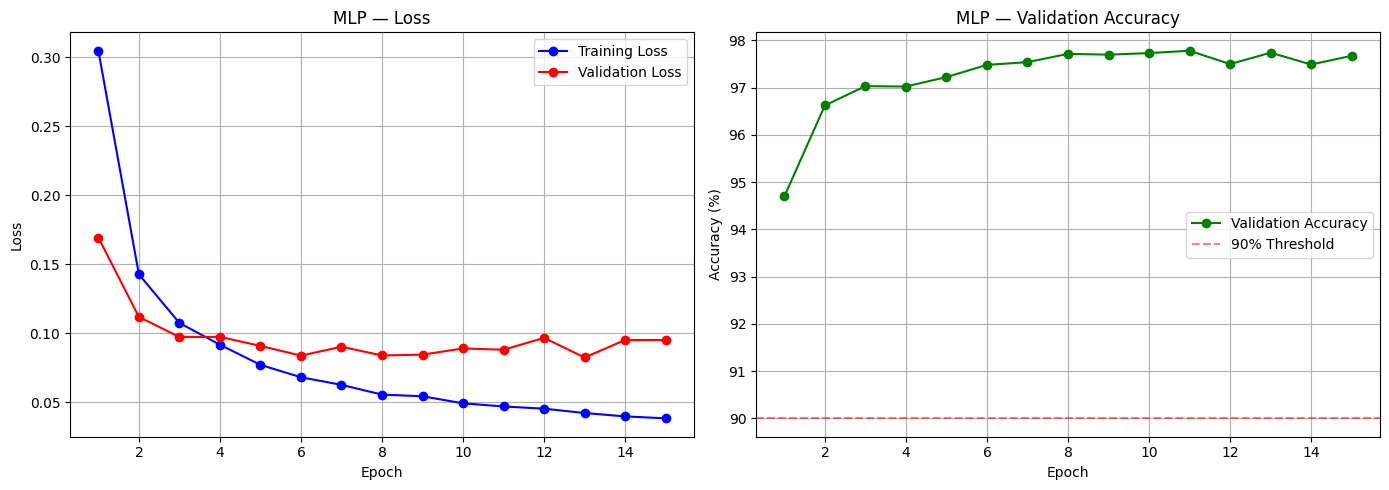

In [9]:
def plot_training(history, title="Training Results"):
    epochs = range(1, len(history['train_loss']) + 1)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Loss curves
    ax1.plot(epochs, history['train_loss'], 'b-o', label='Training Loss')
    ax1.plot(epochs, history['val_loss'], 'r-o', label='Validation Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.set_title(f'{title} — Loss')
    ax1.legend()
    ax1.grid(True)

    # Accuracy curve
    ax2.plot(epochs, history['val_accuracy'], 'g-o', label='Validation Accuracy')
    ax2.axhline(y=90, color='r', linestyle='--', alpha=0.5, label='90% Threshold')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy (%)')
    ax2.set_title(f'{title} — Validation Accuracy')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

plot_training(mlp_history, title="MLP")

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [10]:
def evaluate_model(model, test_loader, device):
    """Compute test accuracy."""
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            pred = output.argmax(dim=1)
            correct += pred.eq(target).sum().item()
            total += target.size(0)
    accuracy = 100.0 * correct / total
    return accuracy

mlp_accuracy = evaluate_model(model_mlp, test_loader, device)
print(f"MLP Test Accuracy: {mlp_accuracy:.2f}%")
assert mlp_accuracy >= 90, f"Accuracy {mlp_accuracy:.2f}% is below 90% threshold!"
print("PASSED: Test accuracy >= 90%")

MLP Test Accuracy: 97.67%
PASSED: Test accuracy >= 90%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

MNISTClassifierCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout2d): Dropout2d(p=0.25, inplace=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

Total parameters: 421,642


Epoch  1/10 | Train Loss: 0.2495 | Val Loss: 0.0662 | Val Accuracy: 98.04%


Epoch  2/10 | Train Loss: 0.0975 | Val Loss: 0.0518 | Val Accuracy: 98.46%


Epoch  3/10 | Train Loss: 0.0752 | Val Loss: 0.0441 | Val Accuracy: 98.67%


Epoch  4/10 | Train Loss: 0.0619 | Val Loss: 0.0398 | Val Accuracy: 98.83%


Epoch  5/10 | Train Loss: 0.0558 | Val Loss: 0.0382 | Val Accuracy: 98.80%


Epoch  6/10 | Train Loss: 0.0498 | Val Loss: 0.0355 | Val Accuracy: 98.97%


Epoch  7/10 | Train Loss: 0.0425 | Val Loss: 0.0373 | Val Accuracy: 98.95%


Epoch  8/10 | Train Loss: 0.0420 | Val Loss: 0.0339 | Val Accuracy: 99.09%


Epoch  9/10 | Train Loss: 0.0375 | Val Loss: 0.0378 | Val Accuracy: 99.03%


Epoch 10/10 | Train Loss: 0.0356 | Val Loss: 0.0383 | Val Accuracy: 98.97%


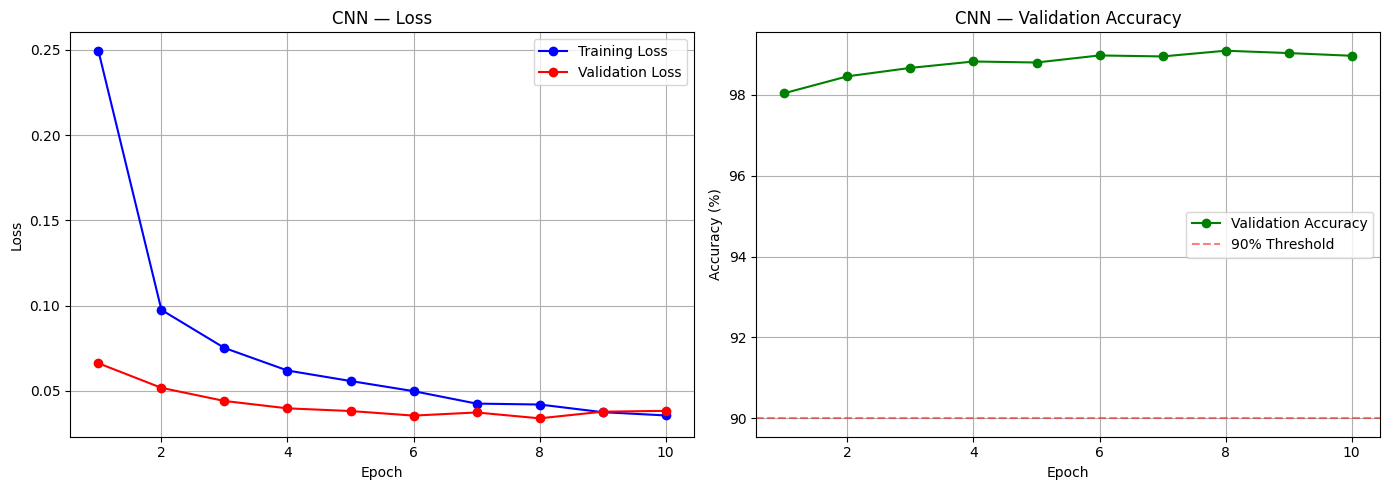


CNN Test Accuracy: 99.14%


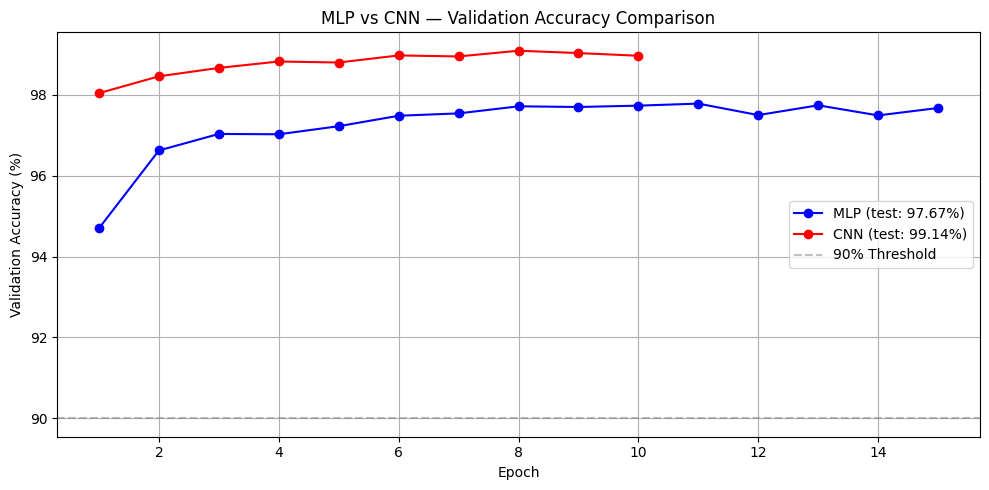


--- Comparison with LeCun MNIST Benchmarks ---
Model                            Accuracy
------------------------------------------
Linear classifier (LeCun 1998)     88.00%
2-layer NN (LeCun 1998)            95.30%
Our MLP (3 layers + dropout)       97.67%
LeNet-5 (LeCun 1998)               99.05%
Our CNN (2 conv + 2 FC)            99.14%
Best CNN (Ciresan 2011)            99.65%

Our MLP significantly outperforms the simple linear and 2-layer baselines.
Our CNN approaches LeNet-5 performance, demonstrating the power of
convolutional architectures for spatial feature extraction in image data.


In [11]:
# Stand-out suggestion 2: Build an improved CNN architecture
class MNISTClassifierCNN(nn.Module):
    def __init__(self):
        super(MNISTClassifierCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout2d = nn.Dropout2d(0.25)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))       # 28x28 -> 14x14
        x = self.pool(F.relu(self.conv2(x)))        # 14x14 -> 7x7
        x = self.dropout2d(x)
        x = x.view(-1, 64 * 7 * 7)
        x = self.dropout(F.relu(self.fc1(x)))
        x = F.log_softmax(self.fc2(x), dim=1)
        return x

model_cnn = MNISTClassifierCNN().to(device)
criterion_cnn = nn.NLLLoss()
optimizer_cnn = optim.Adam(model_cnn.parameters(), lr=0.001)

print(model_cnn)
print(f"\nTotal parameters: {sum(p.numel() for p in model_cnn.parameters()):,}")

# Train the CNN
cnn_history = train_model(model_cnn, train_loader, val_loader, criterion_cnn, optimizer_cnn, device, epochs=10)

# Plot CNN training results
plot_training(cnn_history, title="CNN")

# Evaluate CNN on test set
cnn_accuracy = evaluate_model(model_cnn, test_loader, device)
print(f"\nCNN Test Accuracy: {cnn_accuracy:.2f}%")

# Comparison plot: MLP vs CNN
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(range(1, len(mlp_history['val_accuracy']) + 1), mlp_history['val_accuracy'], 'b-o', label=f'MLP (test: {mlp_accuracy:.2f}%)')
ax.plot(range(1, len(cnn_history['val_accuracy']) + 1), cnn_history['val_accuracy'], 'r-o', label=f'CNN (test: {cnn_accuracy:.2f}%)')
ax.axhline(y=90, color='gray', linestyle='--', alpha=0.5, label='90% Threshold')
ax.set_xlabel('Epoch')
ax.set_ylabel('Validation Accuracy (%)')
ax.set_title('MLP vs CNN — Validation Accuracy Comparison')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

# Stand-out suggestion 3: Contextualize results against LeCun benchmarks
print("\n--- Comparison with LeCun MNIST Benchmarks ---")
print(f"{'Model':<30} {'Accuracy':>10}")
print("-" * 42)
print(f"{'Linear classifier (LeCun 1998)':<30} {'88.00%':>10}")
print(f"{'2-layer NN (LeCun 1998)':<30} {'95.30%':>10}")
print(f"{'Our MLP (3 layers + dropout)':<30} {f'{mlp_accuracy:.2f}%':>10}")
print(f"{'LeNet-5 (LeCun 1998)':<30} {'99.05%':>10}")
print(f"{'Our CNN (2 conv + 2 FC)':<30} {f'{cnn_accuracy:.2f}%':>10}")
print(f"{'Best CNN (Ciresan 2011)':<30} {'99.65%':>10}")
print("\nOur MLP significantly outperforms the simple linear and 2-layer baselines.")
print("Our CNN approaches LeNet-5 performance, demonstrating the power of")
print("convolutional architectures for spatial feature extraction in image data.")

## Saving your model
Using `torch.save`, save your model for future loading.

In [12]:
# Save the CNN model (best performer)
torch.save(model_cnn.state_dict(), 'mnist_cnn_model.pt')
print("Model saved to mnist_cnn_model.pt")

# Verify by loading back and re-evaluating
model_verify = MNISTClassifierCNN().to(device)
model_verify.load_state_dict(torch.load('mnist_cnn_model.pt', weights_only=True))
verify_accuracy = evaluate_model(model_verify, test_loader, device)
print(f"Verified loaded model accuracy: {verify_accuracy:.2f}%")
print("Model saved and verified successfully!")

Model saved to mnist_cnn_model.pt


Verified loaded model accuracy: 99.14%
Model saved and verified successfully!
